In [1]:
from trajectory_generator import TrajectoryGenerator
import numpy as np
import matplotlib.pyplot as plt
# import plotly as py
# import plotly.graph_objs as go
# import plotly.graph_objects as go
# import ipywidgets as widgets
# from plotly.subplots import make_subplots
# py.offline.init_notebook_mode(connected=True)

In [2]:
# Berio Code
parameters = {"step_size": 0.01, "t_points": np.array([[0,0], [-50, 100], [100,70], [-40, 120]]).T,
              "delta": np.array([0.3, 0.3, 0.3]), "Ac": np.array([0.05, 0.05, 0.05]),
              "delta_t": np.array([0.4, 0.4, 0.4]), "T": np.array([0.3, 0.3, 0.3])}

# Letter G
# parameters = {"step_size": 0.01, "t_points": np.array([[0,0], [-10,10], [-20,-10], [-10,-30], [0,-10], [-10,-10]]), "delta": [-0.9, -0.5, -0.9, -1, 0.1], "Ac": [0.05, 0.01, 0.01, 0.01, 0.02], "delta_t": [0, 0, 0, 0, 0], "T": [0.15, 0.2, 0.25, 0.4, 0.1]}

# Fig 8. Djioua08EPM
#parameters = {"step_size": 0.01, "t_points": np.array([[25,18], [6,4], [8,5.5]]), "delta": [-0.5, 0.5], "Ac": [0.043949, 0.1082468], "delta_t": [0, 0], "T": [0.260832, 0.150658]}
#parameters = {"step_size": 0.01, "t_points": np.array([[25,18], [6,4], [8,5.5]]), "delta": [-0.5, 0.5], "Ac": [0.043949, 0.1082468], "delta_t": [0, 0], "T": [0.5, 0.2]}

trajectory_generator = TrajectoryGenerator(**parameters)
trajectory, velocities, = trajectory_generator.generate_trajectory()
print(trajectory)


[[-4.67686352e-02 -1.64756567e-01 -4.58271833e-01 -1.05882112e+00
  -2.11208062e+00 -3.74611941e+00 -6.04094794e+00 -9.00579655e+00
  -1.25686873e+01 -1.65824088e+01 -2.08474127e+01 -2.51457626e+01
  -2.92758831e+01 -3.30786429e+01 -3.64500590e+01 -3.93412211e+01
  -4.17493809e+01 -4.37049685e+01 -4.52584000e+01 -4.64689904e+01
  -4.73968812e+01 -4.80979290e+01 -4.86210183e+01 -4.90071130e+01
  -4.92894166e+01 -4.94941431e+01 -4.96415532e+01 -4.97470342e+01
  -4.98221037e+01 -4.98752780e+01 -4.99127887e+01 -4.99391557e+01
  -4.99576326e+01 -4.99705462e+01 -4.99795512e+01 -4.99858186e+01
  -4.99901736e+01 -4.99931956e+01 -4.99952905e+01 -4.99967414e+01
  -4.99977457e+01 -4.99984405e+01 -4.99989210e+01 -4.99992533e+01
  -4.99994830e+01 -4.99996420e+01 -4.99997519e+01 -4.99998280e+01
  -4.99998806e+01 -4.99999171e+01 -4.99999424e+01 -4.99999599e+01
  -4.99999721e+01 -4.99999806e+01]
 [ 1.44090625e-01  5.06722787e-01  1.40343241e+00  3.21476956e+00
   6.31932352e+00  1.09675685e+01  1.7186

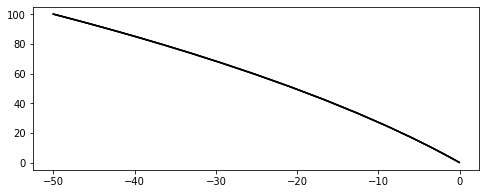

In [3]:
fig = plt.figure(figsize=(8,3))
plt.plot(trajectory[0,:], trajectory[1,:], 'k')
plt.plot(trajectory[0,:], trajectory[1,:], 'k')
plt.plot(trajectory[0,:], trajectory[1,:], 'k')